
Top 10 Most Volatile Products by Price:
                              product_id  price_volatility
17  d7320e1a-eacb-4858-bd84-ef191945c0d7          5.944002
1   3b3e2c46-9899-4f14-8f8f-74ec3a1d31a7          5.338124
7   5fdf1c13-c0b2-44d8-b073-2cc4384a802f          5.066800
10  9e6663e2-5f4d-43c6-ab9a-39ea51aaa01e          4.531573
22  feaf28a3-4c63-40e2-9b33-a5a00273f91b          4.449070
21  f596dfea-1a5b-4173-aa60-1fbad5af36da          4.408462
0   1f59c631-ca0d-47d9-aac2-8da2dbc1f134          4.243929
6   5875ebb3-bba7-4356-bb0e-9f3c7679c975          3.866097
18  e1f5482e-57ff-4333-aa1d-e0df4a8f1901          3.761193
5   560b49be-32ad-4267-97da-21148ccce35e          3.724393


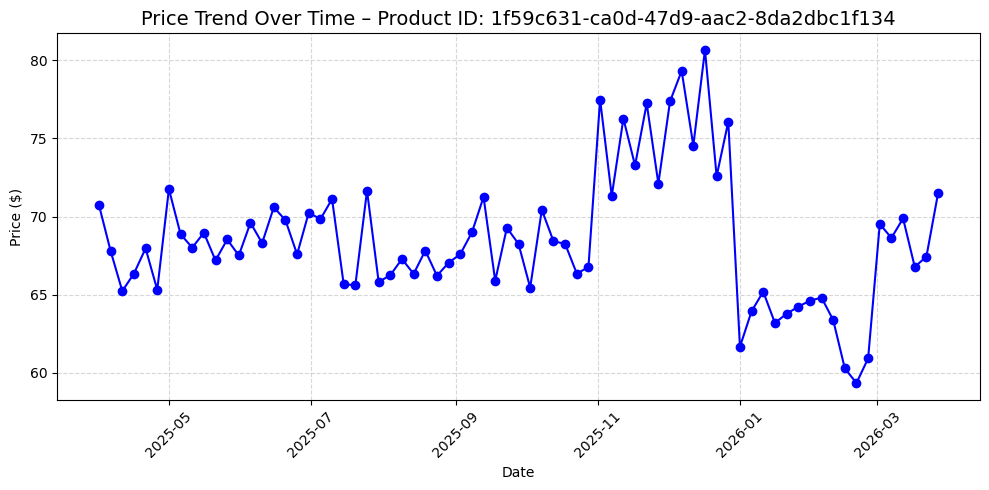


Number of sales detected for Product 1f59c631-ca0d-47d9-aac2-8da2dbc1f134: 34
Average interval between sales: 10 days
Last sale date: 2026-03-17
Predicted next sale date: 2026-03-27


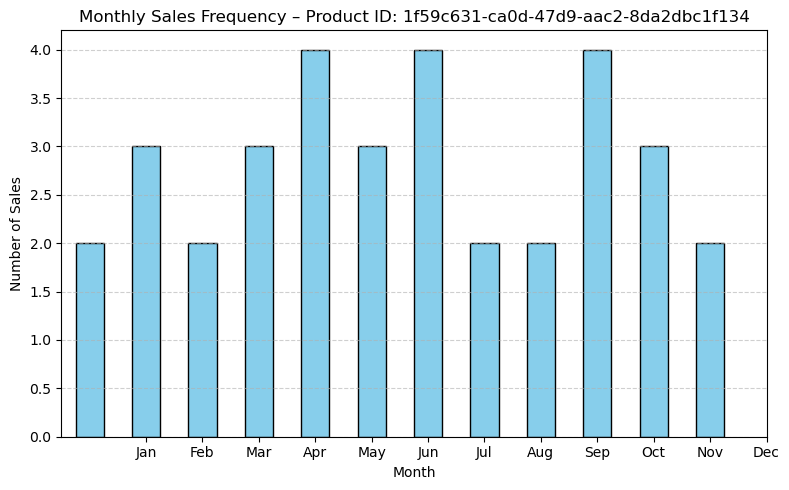

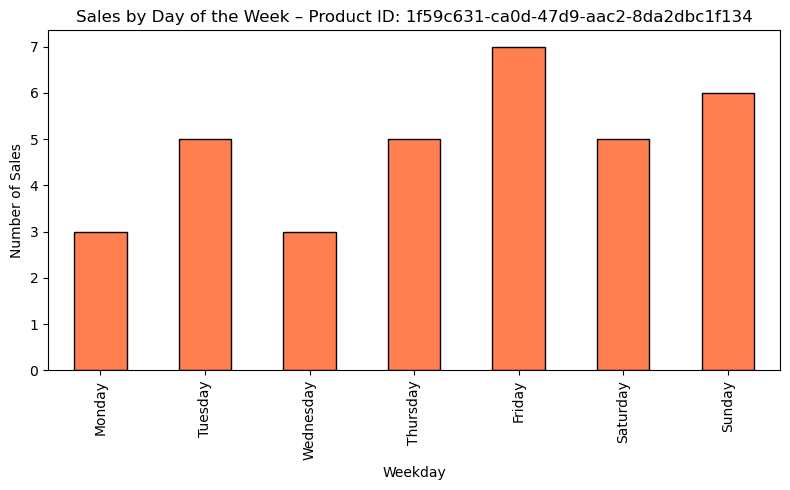

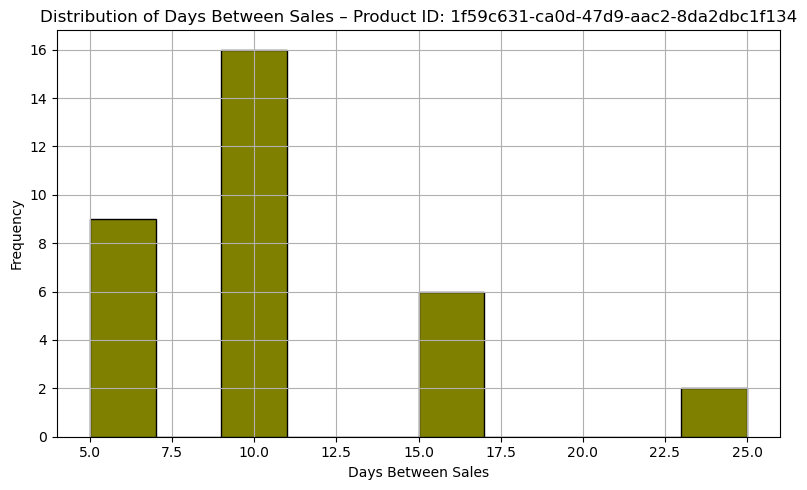

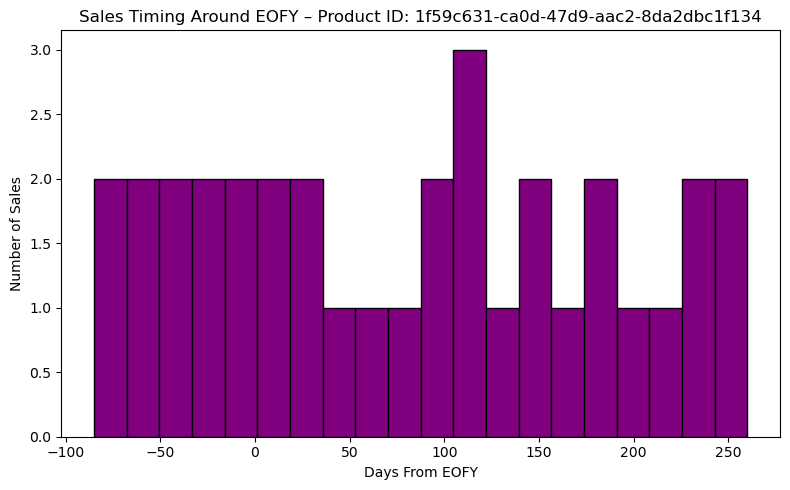

<Figure size 1000x600 with 0 Axes>

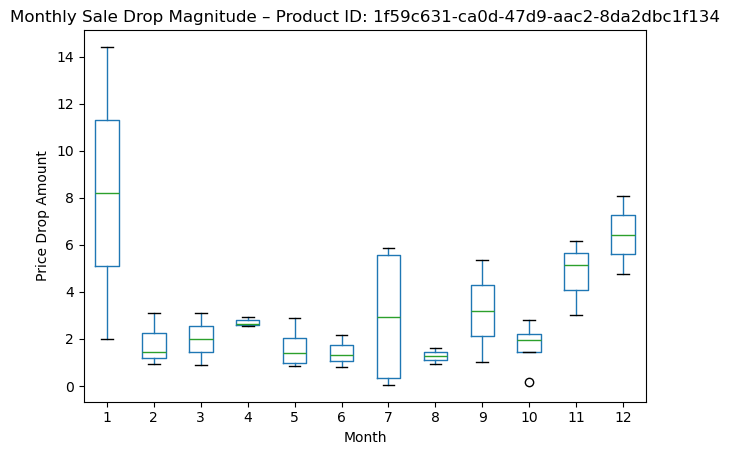

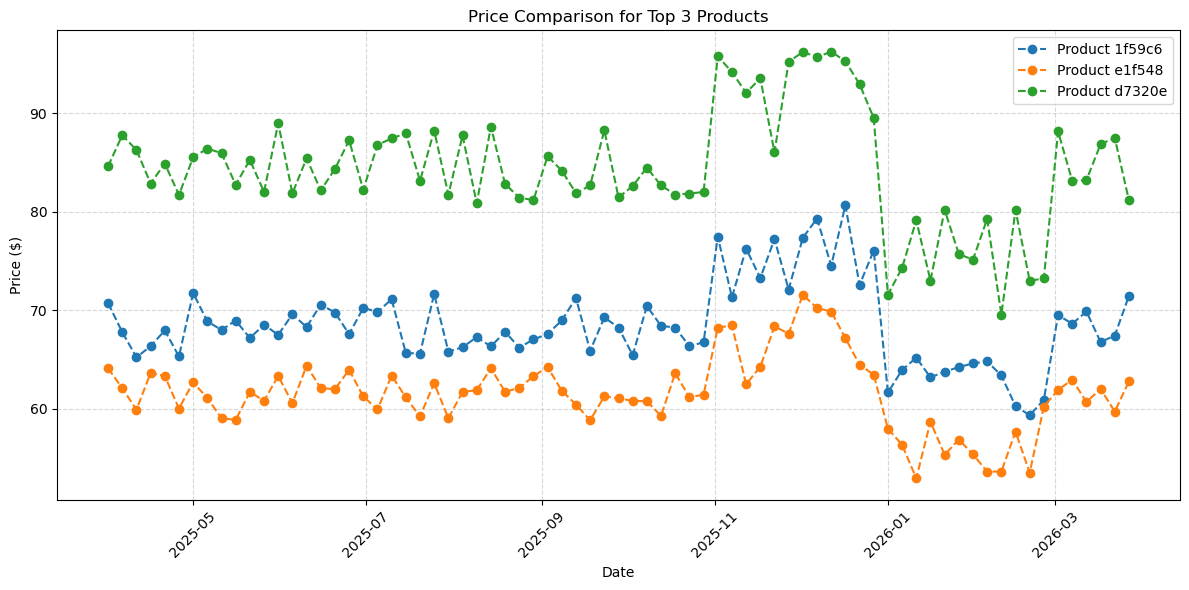

[PED] Skipped: 'quantity' column not present in dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# --- Load and Prepare Data ---
df = pd.read_csv('AugmentedData.product_pricing_full_year_5day.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# --- Price Volatility Analysis ---
volatility_df = df.groupby('product_id')['price'].std().reset_index(name='price_volatility')
top_volatile = volatility_df.sort_values(by='price_volatility', ascending=False).head(10)
print("\nTop 10 Most Volatile Products by Price:")
print(top_volatile)

# --- Select Most Common Product for Detailed Analysis ---
most_common_product = df['product_id'].value_counts().idxmax()
product_df = df[df['product_id'] == most_common_product].copy()
product_df = product_df.sort_values('date')

# --- Price Trend Visualization ---
plt.figure(figsize=(10, 5))
plt.plot(product_df['date'], product_df['price'], marker='o', linestyle='-', color='blue')
plt.title(f"Price Trend Over Time – Product ID: {most_common_product}", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Sales Detection: Identify Price Drops ---
product_df['price_diff'] = product_df['price'].diff()
sales_df = product_df[product_df['price_diff'] < 0].copy()
num_sales_detected = sales_df.shape[0]
print(f"\nNumber of sales detected for Product {most_common_product}: {num_sales_detected}")

# --- Time Between Sales and Next Sale Prediction ---
sales_df['days_between_sales'] = sales_df['date'].diff().dt.days
avg_days_between_sales = int(sales_df['days_between_sales'].mean())
last_sale_date = sales_df['date'].max()
predicted_next_sale = last_sale_date + timedelta(days=avg_days_between_sales)

print(f"Average interval between sales: {avg_days_between_sales} days")
print(f"Last sale date: {last_sale_date.date()}")
print(f"Predicted next sale date: {predicted_next_sale.date()}")

# --- Seasonal Sales Pattern: Monthly Frequency ---
sales_df['month'] = sales_df['date'].dt.month
monthly_counts = sales_df['month'].value_counts().sort_index()

if not monthly_counts.empty:
    plt.figure(figsize=(8, 5))
    monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Monthly Sales Frequency – Product ID: {most_common_product}")
    plt.xlabel("Month")
    plt.ylabel("Number of Sales")
    plt.xticks(ticks=range(1,13), labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("No sales detected for monthly frequency plot.")

# --- Sales by Weekday ---
sales_df['weekday'] = sales_df['date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = sales_df['weekday'].value_counts().reindex(weekday_order).fillna(0)

plt.figure(figsize=(8, 5))
weekday_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title(f"Sales by Day of the Week – Product ID: {most_common_product}")
plt.xlabel("Weekday")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

# --- Distribution of Days Between Sales ---
plt.figure(figsize=(8, 5))
sales_df['days_between_sales'].dropna().hist(bins=10, edgecolor='black', color='olive')
plt.title(f"Distribution of Days Between Sales – Product ID: {most_common_product}")
plt.xlabel("Days Between Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Sales Timing Around EOFY (June 30, 2025) ---
eofy_date = pd.Timestamp("2025-06-30")
sales_df['days_from_eofy'] = (sales_df['date'] - eofy_date).dt.days

plt.figure(figsize=(8, 5))
plt.hist(sales_df['days_from_eofy'], bins=20, edgecolor='black', color='purple')
plt.title(f"Sales Timing Around EOFY – Product ID: {most_common_product}")
plt.xlabel("Days From EOFY")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

# --- Monthly Sale Drop Magnitude Boxplot ---
sales_df['drop_amount'] = -sales_df['price_diff']

plt.figure(figsize=(10, 6))
sales_df.boxplot(column='drop_amount', by='month', grid=False)
plt.title(f"Monthly Sale Drop Magnitude – Product ID: {most_common_product}")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Price Drop Amount")
plt.tight_layout()
plt.show()

# --- Top 3 Products Price Trend Comparison ---
top3_products = df['product_id'].value_counts().head(3).index.tolist()

if top3_products:
    plt.figure(figsize=(12, 6))
    for pid in top3_products:
        prod_data = df[df['product_id'] == pid].sort_values('date')
        plt.plot(prod_data['date'], prod_data['price'], marker='o', linestyle='--', label=f'Product {str(pid)[:6]}')
    plt.title("Price Comparison for Top 3 Products")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Top-3 trend plot skipped: Not enough products.")

# --- Optional: Price Elasticity of Demand (PED) ---
if 'quantity' in df.columns:
    try:
        ped_df = df[(df['price'] > 0) & (df['quantity'] > 0)].copy()
        ped_df['log_price'] = np.log(ped_df['price'])
        ped_df['log_qty'] = np.log(ped_df['quantity'])

        def ped_slope(group):
            x = group['log_price'].values
            y = group['log_qty'].values
            if len(x) < 2 or np.var(x) == 0:
                return np.nan
            return np.cov(x, y, ddof=0)[0, 1] / np.var(x)

        ped_results = ped_df.groupby('product_id').apply(ped_slope).reset_index(name='ped_slope').dropna()

        ped_results['interpretation'] = np.where(
            ped_results['ped_slope'] <= -1, 'elastic (price-sensitive)',
            np.where(ped_results['ped_slope'] < 0, 'inelastic (price-insensitive)', 'no relationship')
        )

        print("\n[PED] Estimated Elasticity (dlnQ/dlnP) by Product (most elastic first):")
        print(ped_results.sort_values('ped_slope').head(10))

        top_elastic = ped_results.sort_values('ped_slope').head(5)
        if not top_elastic.empty:
            plt.figure(figsize=(8, 5))
            plt.barh(top_elastic['product_id'].astype(str).str[:8], top_elastic['ped_slope'])
            plt.title("Top 5 Most Elastic Products (more negative = more sensitive)")
            plt.xlabel("PED (Slope dlnQ/dlnP)")
            plt.grid(axis='x', linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"[PED] Could not compute elasticity: {e}")
else:
    print("[PED] Skipped: 'quantity' column not present in dataset.")


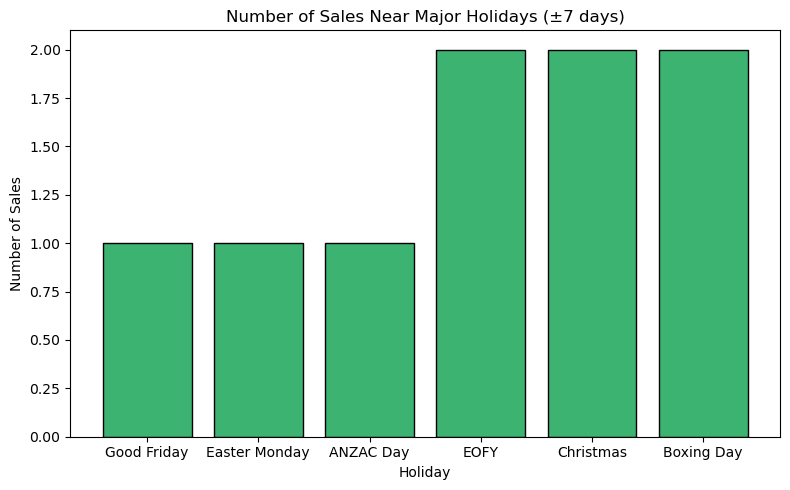

6 out of 34 sales (17.6%) occurred within ±7 days of a major holiday.


In [3]:
# --- Flag Sales Near Public Holidays ---
holidays = {
    'Good Friday': pd.Timestamp('2025-04-18'),
    'Easter Monday': pd.Timestamp('2025-04-21'),
    'ANZAC Day': pd.Timestamp('2025-04-25'),
    'EOFY': pd.Timestamp('2025-06-30'),
    'Christmas': pd.Timestamp('2025-12-25'),
    'Boxing Day': pd.Timestamp('2025-12-26')
}

for name, date in holidays.items():
    sales_df[f'days_from_{name.replace(" ", "_")}'] = (sales_df['date'] - date).dt.days
    
window = 7
def is_near_holiday(row):
    return any(abs(row[f'days_from_{name.replace(" ", "_")}']) <= window for name in holidays)

sales_df['near_holiday'] = sales_df.apply(is_near_holiday, axis=1)

holiday_sales_counts = {}
for name in holidays:
    col = f'days_from_{name.replace(" ", "_")}'
    count = sales_df[col].abs().le(window).sum()
    holiday_sales_counts[name] = count

# Visualise sales near holidays
plt.figure(figsize=(8, 5))
plt.bar(holiday_sales_counts.keys(), holiday_sales_counts.values(), color='mediumseagreen', edgecolor='black')
plt.title("Number of Sales Near Major Holidays (±7 days)")
plt.xlabel("Holiday")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

# Percentage of sales near holidays 
total_sales = len(sales_df)
sales_near_holidays = sales_df['near_holiday'].sum()
percent = (sales_near_holidays / total_sales) * 100
print(f"{sales_near_holidays} out of {total_sales} sales ({percent:.1f}%) occurred within ±{window} days of a major holiday.")

<Figure size 1000x400 with 0 Axes>

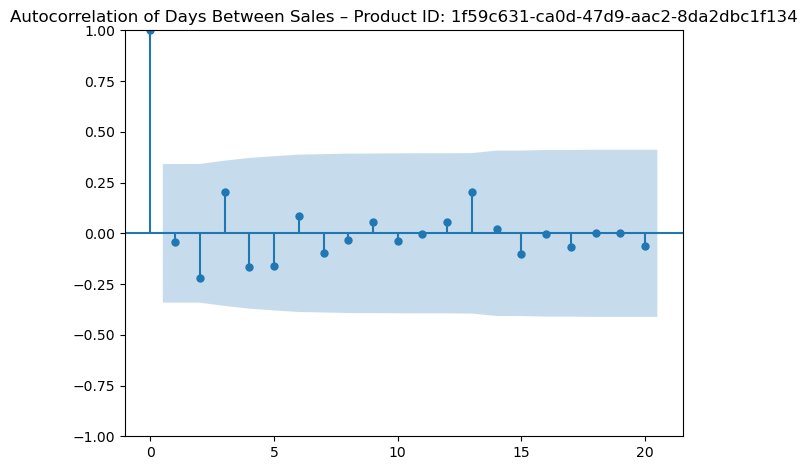

<Figure size 1000x400 with 0 Axes>

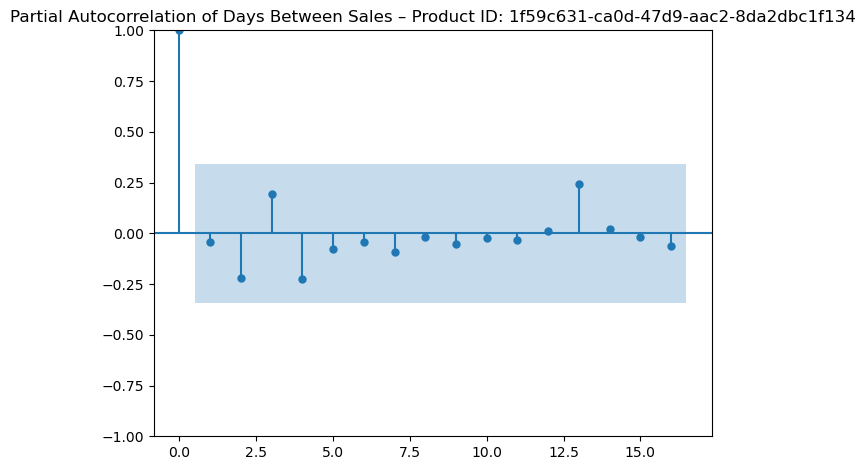

<Figure size 1000x400 with 0 Axes>

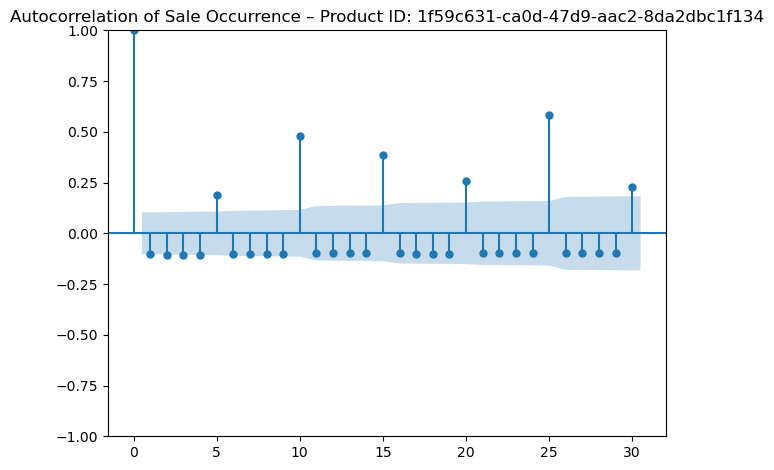

In [4]:
# --- Autocorrelation & Lag Effects (Sales Momentum) ---

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = sales_df['days_between_sales'].dropna()

if not series.empty:
    # ACF of the gap sizes 
    plt.figure(figsize=(10, 4))
    plot_acf(series, lags=20)
    plt.title(f"Autocorrelation of Days Between Sales – Product ID: {most_common_product}")
    plt.tight_layout()
    plt.show()

    # PACF needs lags ≤ 50% of sample size
    n_obs = len(series)
    max_lags = max(1, n_obs // 2)

    plt.figure(figsize=(10, 4))
    plot_pacf(series, lags=min(20, max_lags), method='ywm')
    plt.title(f"Partial Autocorrelation of Days Between Sales – Product ID: {most_common_product}")
    plt.tight_layout()
    plt.show()
else:
    print("No sufficient sales intervals for autocorrelation analysis.")

# Autocorrelation of sale occurrence (1 on sale day, else 0)
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
sale_dates = sales_df['date'].dt.floor('D')
sale_indicator = pd.Series(0, index=date_range)
sale_indicator.loc[sale_dates] = 1

plt.figure(figsize=(10, 4))
plot_acf(sale_indicator, lags=30)
plt.title(f"Autocorrelation of Sale Occurrence – Product ID: {most_common_product}")
plt.tight_layout()
plt.show()

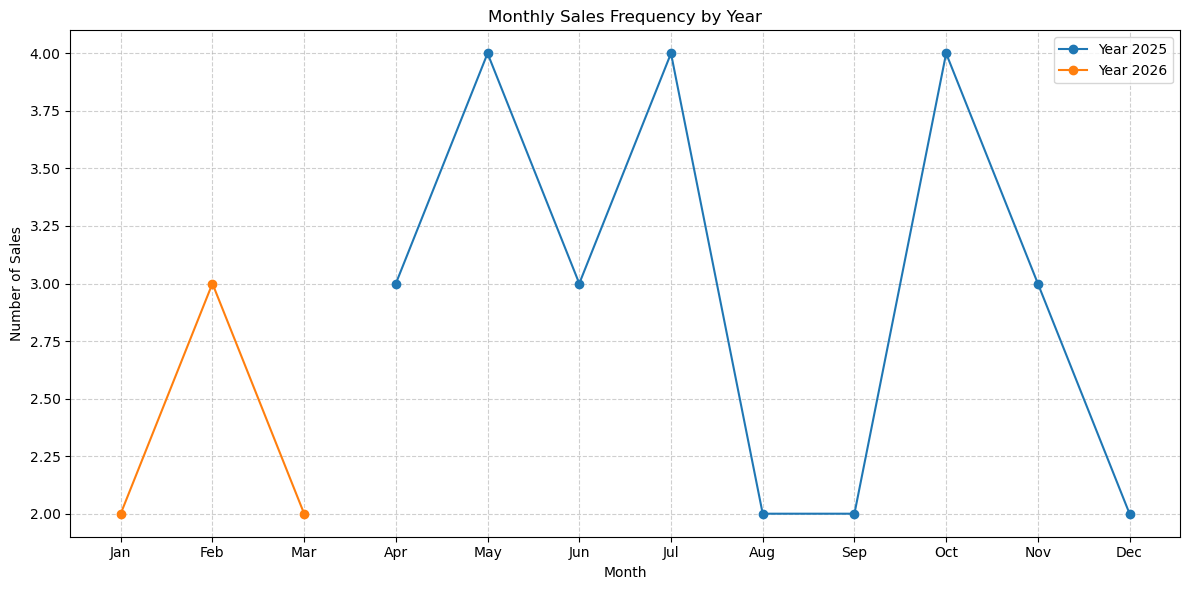

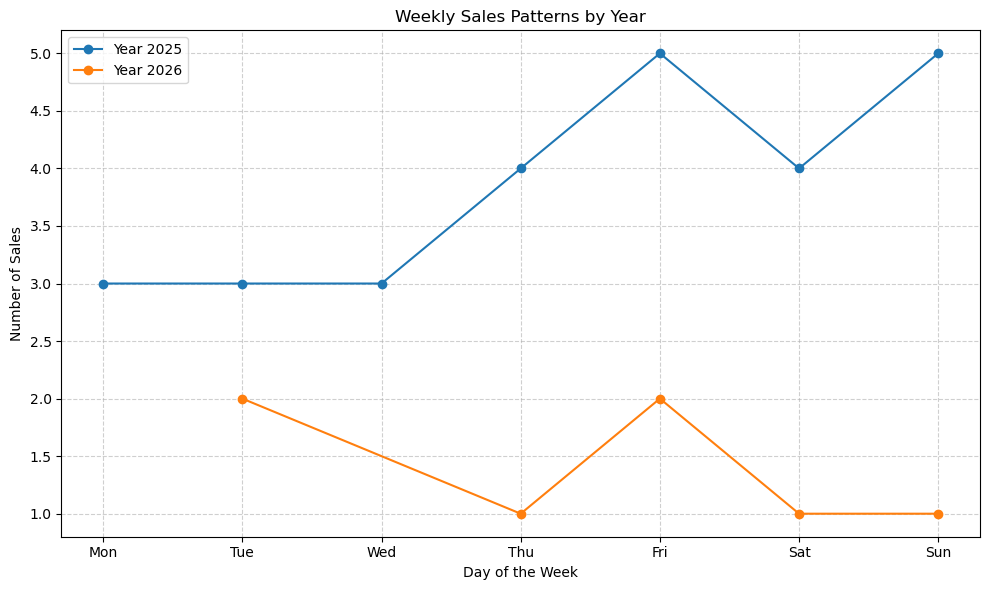

   year  half  sales_count
0  2025     1           10
1  2025     2           17
2  2026     1            7
EOFY sales by year:
 year
2025    3
dtype: int64


In [10]:
# --- Seasonality evolution over time ---

# Split time features
sales_df = sales_df.copy()
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['weekday'] = sales_df['date'].dt.weekday 
sales_df['half'] = (sales_df['month'] <= 6).astype(int).replace({0:2})  # 1=H1, 2=H2

# 1) Monthly sales per year
monthly_trends = (
    sales_df.groupby(['year', 'month'])
            .size()
            .reset_index(name='sales_count')
)

plt.figure(figsize=(12, 6))
for yr, grp in monthly_trends.groupby('year'):
    plt.plot(grp['month'], grp['sales_count'], marker='o', label=f"Year {yr}")
plt.title("Monthly Sales Frequency by Year")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(range(1, 13), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 2) Weekly sales pattern per year
weekly_trends = (
    sales_df.groupby(['year', 'weekday'])
            .size()
            .reset_index(name='sales_count')
)

plt.figure(figsize=(10, 6))
for yr, grp in weekly_trends.groupby('year'):
    plt.plot(grp['weekday'], grp['sales_count'], marker='o', label=f"Year {yr}")
plt.title("Weekly Sales Patterns by Year")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Sales")
plt.xticks([0,1,2,3,4,5,6], ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 3) Half year trends 
half_year_trends = (
    sales_df.groupby(['year', 'half'])
            .size()
            .reset_index(name='sales_count')
)
print(half_year_trends)

# 3) EOFY comparison across years (June)
eofy_sales = sales_df[sales_df['month'] == 6].groupby('year').size()
print("EOFY sales by year:\n", eofy_sales)